## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [1]:
import pandas as pd
data = pd.read_csv('assets/real_estate.csv', sep = ';', decimal = ',')
print(data.info())
# data.style
# data frame con 37 variables (incluyendo Unnamed: 0) y 15335 observaciones

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

#### What is the most expensive home in the dataset? (★☆☆)

In [2]:
print(data['price'].max()) # precio mas alto: 8500000
print(data['price'].argmax()) # fila del precio mas alto: 13110
print(data['id_realEstates'][13110]) # id del precio mas alto: 132042636

8500000
13110
132042636


#### What is cheapest home in the dataset? (★☆☆)

In [3]:
print(data['price'].min()) # precio mas bajo: 0
print(data['price'][data['price'] > 0].min()) # precio mas bajo sin el cero: 600
print(data['id_realEstates'][data['price'] == 600]) # id del precio mas bajo sin el cero: 153977752

0
600
7491    153977752
Name: id_realEstates, dtype: int64


#### What is the biggest and the smallest home in the dataset? (★☆☆)

In [4]:
print(data['surface'].min()) # superficie minima: 15
print(sum(data['surface'] == data['surface'].min())) # solo 1 casa con sup = 15
print(data['id_realEstates'][data['surface'].argmin()]) # id de la de superficie minima: 152817874
print(data['surface'].max()) # superficie maxima: 249000
print(sum(data['surface'] == data['surface'].max())) # solo 1 casa con sup = 249000
print(data['id_realEstates'][data['surface'].argmax()]) # id de la de superficie maxima: 153936192


15.0
1
152817874
249000.0
1
153936192


#### How many populations (level5) the dataset contains? (★☆☆)

In [5]:
print(data['level5'].size) # 15335
print(data['level5'].isnull().sum()) # no hay valores nulos


15335
0


#### Does the dataset contain NAs? (★☆☆)


In [6]:
data.isna().sum() # si hay en varias variables

Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             15335
customZone          15335
dtype: int64

#### Delete the NAs of the dataset, if applicable (★★☆)

In [7]:
# algunas columnas tienen todas sus entradas null o NA, por eso primero las elimino
data2 = data.dropna(axis = 1, how = 'all')
# level6 tiene casi todo null, la elimino
data2 = data2.dropna(axis = 1, thresh = 1000) # elimino columnas que tengan menos de 1000 entradas no nulas, solo level6
# me fijo que pasa con level4 y level8, que tambien tienen muchos null
data3 = data2.filter(axis = 1, items = ('level4','level8')).dropna()
print(data3.shape) # solamente hay 136 items con level4 y level8 no nulos, elimino ambas variables
# elimino level4 y level8
data2 = data2.dropna(axis = 1, thresh = 8700)
# ahora si elimino filas con algun null
data2 = data2.dropna()
print(data2.shape) # se eliminaron 4310 filas y 3 columnas

# el nuevo data frame es data2!!


(136, 2)
(11025, 32)


#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [8]:
data_aux  = data2[data2['level5'] == 'Arroyomolinos (Madrid)']
print(data_aux.shape) # 110 items con esa caracteristica
print(data_aux['price'].mean()) # precio medio: 298780.2181818182

(110, 32)
298780.2181818182


#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

(array([15., 16., 24., 17., 22., 10.,  2.,  2.,  0.,  2.]),
 array([165338. , 206804.2, 248270.4, 289736.6, 331202.8, 372669. ,
        414135.2, 455601.4, 497067.6, 538533.8, 580000. ]),
 <BarContainer object of 10 artists>)

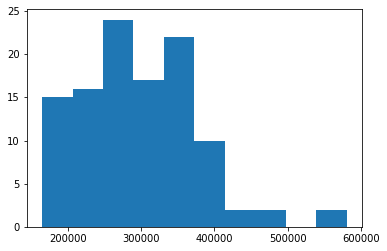

In [9]:
import matplotlib.pyplot as plt
plt.hist(data_aux['price'])
# el precio se concentra entre 200000 y 400000 aprox
# hay unos pocos valores mayores a 400000 


#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

In [10]:
labs = ['Fuenlabrada','Leganés','Getafe','Alcorcón']
# para chequear frecuencias
aux = data2['level5'].value_counts()
print(aux[labs])
data3 = data2[data2['level5'].isin(labs)]
# chequeo que sean las mismas cantidades
print(data3['level5'].value_counts())
print(data3.shape)

Fuenlabrada    182
Leganés        173
Getafe         220
Alcorcón       154
Name: level5, dtype: int64
Getafe         220
Fuenlabrada    182
Leganés        173
Alcorcón       154
Name: level5, dtype: int64
(729, 32)


#### Make a bar plot of the median of prices (★★★) 

<BarContainer object of 4 artists>

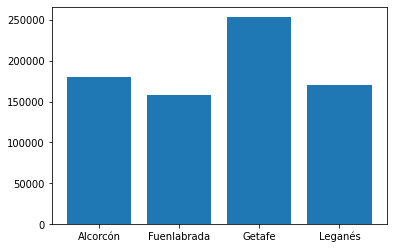

In [11]:
median_level5 = data3.groupby('level5').median()
type(median_level5)
plt.bar(median_level5.index, median_level5['price'])

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

In [12]:
aux = data3[['price','rooms','surface','bathrooms']]
print(aux.info()) # verifico clases
print(aux.mean())
print(aux.var())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 3 to 15325
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      729 non-null    int64  
 1   rooms      729 non-null    float64
 2   surface    729 non-null    float64
 3   bathrooms  729 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 28.5 KB
None
price        220590.636488
rooms             3.001372
surface         110.102881
bathrooms         1.615912
dtype: float64
price        1.529399e+10
rooms        7.101630e-01
surface      4.212972e+03
bathrooms    5.555706e-01
dtype: float64


#### What is the most expensive home of each population? (★★☆) 

In [13]:
max_level5 = data3.groupby('level5').max()
max_price = max_level5['price'] # son los precios maximos por level5
# abajo cuales son las casas de mayor precio por level5
for i in range(len(max_price)):
    print(str(max_price.index[i])+':'+str(data3['id_realEstates'][(data3['level5'] == max_price.index[i]) & (data3['price'] == max_price[i])]))

Alcorcón:5585    153275915
Name: id_realEstates, dtype: int64
Fuenlabrada:11561    153660921
Name: id_realEstates, dtype: int64
Getafe:2881    151105544
Name: id_realEstates, dtype: int64
Leganés:10412    152251506
Name: id_realEstates, dtype: int64


#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

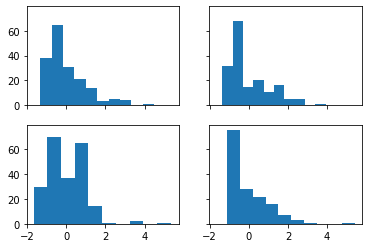

In [14]:
import pandas as pd
fig, ax = plt.subplots(2, 2, sharex = True, sharey = True)
ax1 = pd.Series([0,0,1,1])
ax2 = pd.Series([0,1,0,1])
for i in range(len(labs)):
    price = data3['price'][data3['level5']==labs[i]]
    price_norm = (price - price.mean())/price.std()
    ax[ax1[i],ax2[i]].hist(price_norm)
plt.show()

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [15]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet

from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [16]:
### trabajo con coordenadas

#print(data3.head()) # verifico que exista latitud y longitud
#data3[['longitude', 'latitude']].describe() # verifico valores de las coordenadas
#print(sum(data3['longitude'] == 0)) # 10 casos con longitud 0
#print(sum(data3['latitude'] == 0)) # 10 casos con latitud 0
data3b = data3[data3['latitude'] != 0] # creo nuevo data frame sin puntos en (0,0)
data3b[['longitude', 'latitude']].describe() # no hay mas ceros

### busco coordenadas promedio para centrar mapa

medias_coord = data3b[['latitude', 'longitude']].mean()
print(medias_coord)

### mapeo centrando en esas coordenadas

map = Map(center = (medias_coord[0], medias_coord[1]), zoom = 5, 
    basemap=basemaps.Stamen.Terrain)
map

### la idea era agregarle los puntos a este mapa interactivo, pero no lo pude terminar. Lo resuelvo como una imagen en siguiente chunk

latitude     40.317852
longitude    -3.778559
dtype: float64


Map(center=[40.3178520221545, -3.778558598894389], controls=(ZoomControl(options=['position', 'zoom_in_text', …

/tmp/ipykernel_1300/499511298.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, alpha=0.5)


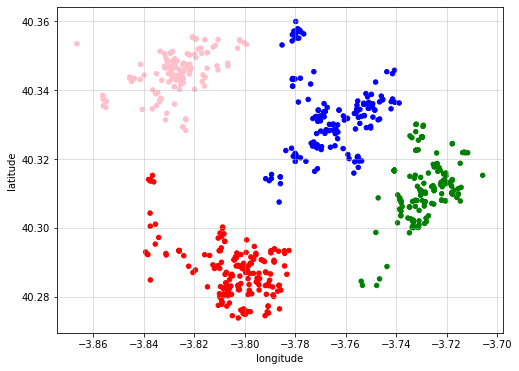

In [17]:
## defino otro data frame sin coordenadas (0,0)

data3b = data3[data3['latitude'] != 0] # creo nuevo data frame sin puntos en (0,0)
data3b[['longitude', 'latitude']].describe() # no hay mas ceros

# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))

## grafico definiendo un color para cada level5
aux = data3b['level5'].map({'Fuenlabrada':'red','Leganés':'blue','Getafe':'green','Alcorcón':'pink'})
data3b.plot(x="longitude", y="latitude", kind="scatter",c=aux,ax=ax)

# add grid
ax.grid(b=True, alpha=0.5)
plt.show()


#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

In [18]:
aux = data3[['price','surface','level5']] # data frame auxiliar
aux = aux[aux['price']>0]
print(aux.shape)
aux['price_m2'] = aux['price']/aux['surface']
#print(aux['price_m2'].describe()) # para chequear valores
aux[['price_m2','level5']].groupby('level5').describe()

# el precio por metro cuadrado en Alcorcón en superior en promedio al de Getafe

(718, 3)


price_m2                                                     \
               count         mean         std          min          25%   
level5                                                                    
Alcorcón       154.0  2244.568484  536.998172  1158.227848  1891.836735   
Fuenlabrada    182.0  1812.300520  409.706158  1034.883721  1578.052326   
Getafe         209.0  2198.094644  596.513947  1196.666667  1734.693878   
Leganés        173.0  2044.838403  474.908572  1000.000000  1671.641791   

                                                    
                     50%          75%          max  
level5                                              
Alcorcón     2208.190582  2449.622642  3698.159509  
Fuenlabrada  1754.032258  2000.000000  3917.525773  
Getafe       2092.307692  2659.168142  3827.160494  
Leganés      1962.809917  2311.594203  3513.513514

#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

In [19]:
aux = data2[['price','surface','level5']] # data frame auxiliar
aux = aux[aux['price']>0]
aux = aux[aux['level5'].isin(['Valdemorillo','Galapagar'])]
print(aux.shape)
aux[['price','level5']].groupby('level5').describe()

# sin considerar precios 0, en promedio ambas distribuciones son muy parecidas, inclusive el promedio y la mediana

(113, 3)


price                                                    \
             count           mean            std       min       25%   
level5                                                                 
Galapagar     67.0  381106.701493  201163.879794  102600.0  260000.0   
Valdemorillo  46.0  384269.565217  192226.352534  103000.0  286000.0   

                                             
                   50%       75%        max  
level5                                       
Galapagar     364000.0  430000.0   995000.0  
Valdemorillo  354000.0  442500.0  1350000.0

#### What happens if we do the same analysis for price/m2 (★★☆) 

In [20]:
aux = data2[['price','surface','level5']] # data frame auxiliar
aux = aux[aux['price']>0]
aux = aux[aux['level5'].isin(['Valdemorillo','Galapagar'])]
print(aux.shape)
aux['price_m2'] = aux['price']/aux['surface']
aux[['price_m2','level5']].groupby('level5').describe()

# en el caso del precio por metro cuadrado, se puede observar que en Valdemorillo el promedio es menor que en Galapagar

(113, 3)


price_m2                                                    \
                count         mean         std         min          25%   
level5                                                                    
Galapagar        67.0  1566.515392  460.846321  162.305725  1329.241071   
Valdemorillo     46.0  1321.766036  527.778818  347.727273   983.333333   

                                                
                      50%          75%     max  
level5                                          
Galapagar     1500.000000  1738.165542  3175.0  
Valdemorillo  1300.983607  1669.873049  2700.0

#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

<AxesSubplot:xlabel='surface', ylabel='price'>

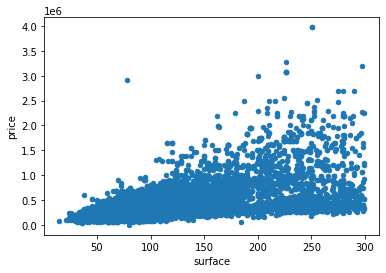

In [21]:
# data frame auxiliar
aux = data2[['surface', 'price']]
aux = aux[aux['price'] > 0]
aux = aux[aux['surface'] < 300]

aux.plot.scatter(x = 'surface', y = 'price')

# si, a mayor superficie mayor precio, aunque también aumenta la variabilidad del mismo

/tmp/ipykernel_1300/795251586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux['surface_rng'][aux['surface'] > 100] = '100_200'
/tmp/ipykernel_1300/795251586.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux['surface_rng'][aux['surface'] > 200] = '200+'


<AxesSubplot:title={'center':'price'}, xlabel='surface_rng'>

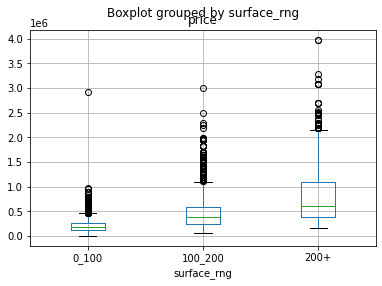

In [22]:
# rangos de superficie
aux['surface_rng'] = '0_100'
aux['surface_rng'][aux['surface'] > 100] = '100_200'
aux['surface_rng'][aux['surface'] > 200] = '200+'

# agrego este grafico para visualizar la variablidiad del precio en funcion de rango de superficie
aux.boxplot(column = 'price', by = 'surface_rng')

#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

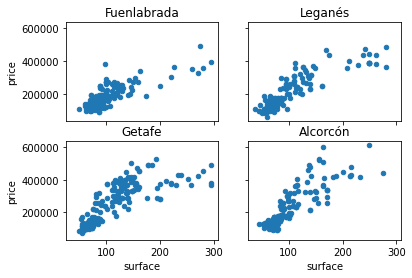

In [23]:
# utilizo el data frame data3 creado previamente filtrando precio 0 y superficie hasta 300
aux = data3[['surface', 'price', 'level5']]
aux = aux[aux['price'] > 0]
aux = aux[aux['surface'] < 300]

#print(labs) # recuerdo nombres

fig, ax = plt.subplots(2, 2, sharex = True, sharey = True)
aux[aux['level5'].isin(['Fuenlabrada'])].plot.scatter(x = 'surface', y = 'price', ax = ax[0,0])
aux[aux['level5'].isin(['Leganés'])].plot.scatter(x = 'surface', y = 'price', ax = ax[0,1])
aux[aux['level5'].isin(['Getafe'])].plot.scatter(x = 'surface', y = 'price', ax = ax[1,0])
aux[aux['level5'].isin(['Alcorcón'])].plot.scatter(x = 'surface', y = 'price', ax = ax[1,1])
ax[0, 0].set_title('Fuenlabrada')
ax[0, 1].set_title('Leganés')
ax[1, 0].set_title('Getafe')
ax[1, 1].set_title('Alcorcón')
plt.show()

#### How many  real estate agencies the dataset contains? (★★☆) 

In [24]:
# lo hago para el data frame sin NAs

#print(data2.columns) # recuerdo columnas
#print(data2.head())

# acá se muestra la frecuencia absoluta de cada agencia, al final figura la cantidad de agencias distintas que es 1337
print(data2['realEstate_name'].value_counts())

engel volkers madrid             421
infocasa consulting              291
housell                          193
vivienda2                        189
solvia inmobiliaria              184
                                ... 
inmoversion                        1
conviventium                       1
cga promociones inmobiliarias      1
exclusivas aragon                  1
montehogar 68                      1
Name: realEstate_name, Length: 1337, dtype: int64


#### What is the population (level 5) that contains the most houses? (★★☆) 

In [25]:
# nuevamente lo hago para el data frame sin NAs
print(data2['level5'].value_counts())

# de acuerdo a lo que se muestra, sería "Madrid Capital"

 Madrid Capital               5658
Alcalá de Henares              474
Las Rozas de Madrid            360
Móstoles                       259
Parla                          248
Alcobendas                     243
Boadilla del Monte             242
Getafe                         220
Torrejón de Ardoz              216
Pozuelo de Alarcón             207
Valdemoro                      201
Fuenlabrada                    182
Collado Villalba               179
Leganés                        173
Alcorcón                       154
Villaviciosa de Odón           143
Coslada                        140
San Sebastián de los Reyes     136
Majadahonda                    133
Arganda del Rey                130
Aranjuez                       127
Pinto                          126
Arroyomolinos (Madrid)         110
Rivas-vaciamadrid              107
Navalcarnero                    84
Torrelodones                    78
San Lorenzo de El Escorial      75
Moralzarzal                     74
El Escorial         